In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)
session = Session(engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
newser= pd.Series(session.query(Measurements.id, Measurements.station, Measurements.date, Measurements.prcp, Measurements.tobs))
newar = newser.array
index = []
station = []
date = []
prcp = []
tobs = []
for i in newar:
    index.append(i[0])
    station.append(i[1])
    pd.to_datetime(date.append(i[2]))
    prcp.append(i[3])
    tobs.append(i[4])
  
dictmeasurements = { "date": date,"station": station, "precipitation": prcp, "tobs": tobs}    
newdf = pd.DataFrame(dictmeasurements)
#recent date 
recent_date=newdf['date'].tail(1)
last_12_months = pd.date_range(end = recent_date.loc[19549], periods = 12, freq= 'MS')
datecol = pd.Series(last_12_months).array
newdf.set_index('date')
new12monthdata = newdf.loc[newdf['date']>='2016-09-01', :]
sorted_data=new12monthdata.sort_values('date',ascending=True)
sorted_data.fillna(0)

,date,station,precipitation,tobs
2372,2016-09-01,USC00519397,0.0,27.2
8831,2016-09-01,USC00517948,0.0,27.8
14616,2016-09-01,USC00519281,0.5,26.7
7338,2016-09-01,USC00514830,0.0,27.8
19209,2016-09-01,USC00516128,0.3,25.0
...,...,...,...,...
12185,2017-08-22,USC00519523,0.0,27.8
7634,2017-08-23,USC00514830,0.0,27.8
12186,2017-08-23,USC00519523,2.0,27.8
2723,2017-08-23,USC00519397,0.0,27.2


In [10]:
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.units as munits
import datetime

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
highest_date = session.query(func.max(Measurements.date)).scalar()
highest_date

'2017-08-23'

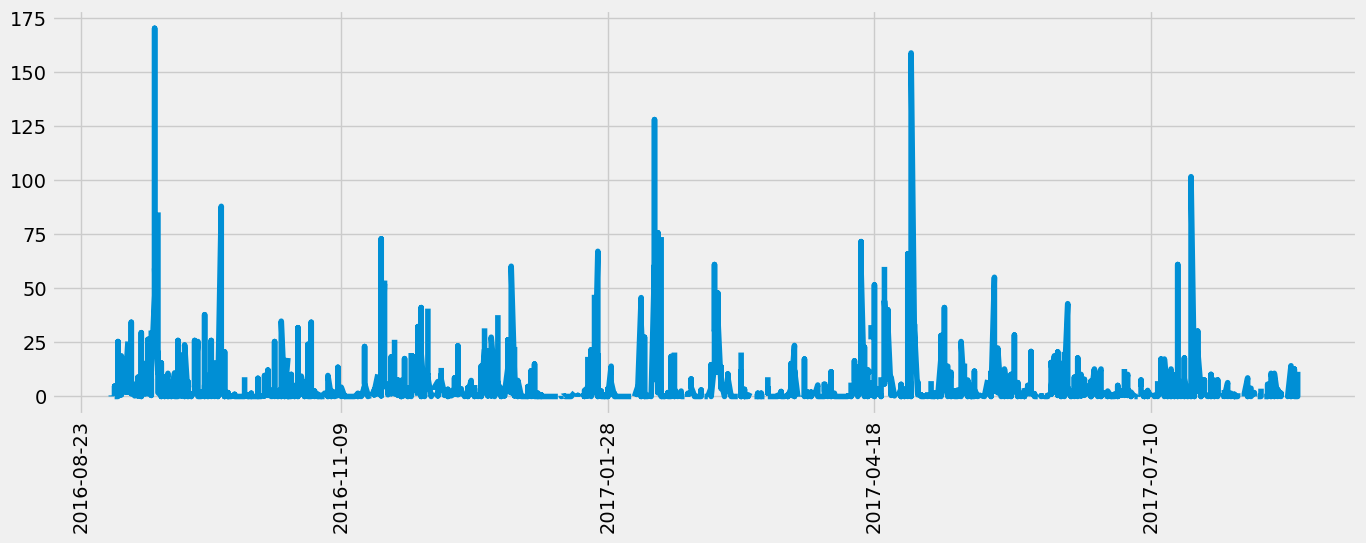

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date=newdf['date'].tail(1)
# Calculate the date one year from the last date in data set
last_12_months = pd.date_range(end = recent_date.loc[19549], periods = 12, freq= 'MS')
datecol = pd.Series(last_12_months).array
newdf.set_index('date')
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
new12monthdata = newdf.loc[newdf['date']>='2016-08-23', :]
new12monthdata.set_index("date")
# Sort the dataframe by date
new12monthdata.sort_index(ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
new12monthdata.fillna(0)
bar_xlabels = ['2016-08-23','2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.figure(figsize = (15, 5))
newdate = pd.to_datetime(sorted_data["date"].array)
newprcp = sorted_data["precipitation"].array
tick_locator = [value for value in bar_xlabels]
plt.plot(newdate, newprcp)
plt.xticks(tick_locator, rotation ='vertical')
plt.xticks(rotation ='vertical')
plt.show()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcpsummary = sorted_data["precipitation"].describe()
summary_stats = pd.DataFrame(prcpsummary)
summary_stats


,precipitation
count,1968.000000
mean,4.358587
std,11.475356
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session = Session(engine)
station_no = []; station_name = []; station_latitude = []; station_longitude = []; station_elevation = [];
newstationseries = pd.Series(session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all())
for i in newstationseries:
    station_no.append(i[0])
    station_name.append(i[1])
    station_latitude.append(i[2])
    station_longitude.append(i[3])
    station_elevation.append(i[4])
stationdata = {"station_no":station_no, "station_name": station_name, "station_latitude":station_latitude, "station_longitude": station_longitude, "station_elevation": station_elevation}
station_df=pd.DataFrame(stationdata)
station_df
station_df["station_no"].count()

9

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations= newdf.groupby("station")["date"].count()
stationactivity=active_stations.sort_values(ascending = False)
list_station= stationactivity.index
countsofstation= stationactivity.values
newstationcountarray= [list_station, countsofstation]
stationactivity
newstationcountarray

[Index(['USC00519281', 'USC00519397', 'USC00513117', 'USC00519523',
        'USC00516128', 'USC00514830', 'USC00511918', 'USC00517948',
        'USC00518838'],
       dtype='object', name='station'),
 array([2772, 2724, 2709, 2669, 2612, 2202, 1979, 1372,  511], dtype=int64)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#most active station id is USC00519281
tobs_USC00519281 = newdf.loc[newdf['station'] == 'USC00519281', ['date','station','tobs']]
mintemp = tobs_USC00519281['tobs'].min()
maxtemp = tobs_USC00519281['tobs'].max()
averagetemp = tobs_USC00519281['tobs'].mean()
list = [(mintemp, maxtemp, averagetemp)]
list


[(12.2, 29.4, 22.035822510822513)]

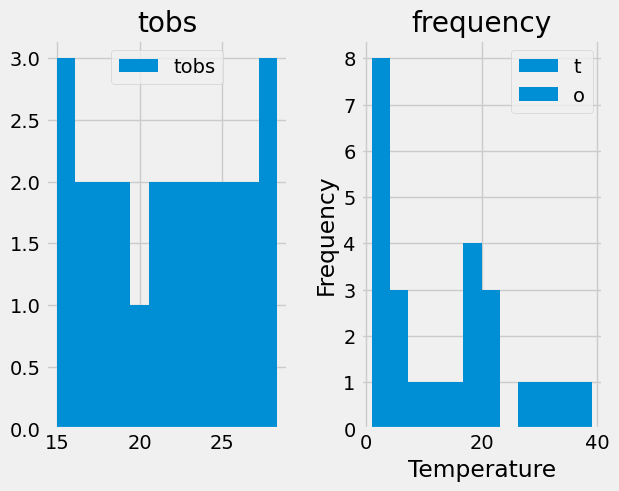

In [44]:
#last 12 months of data for temperature(tobs) from newdf dataframe sorted in descending order 
USC00519281temperature_freq= newdf.loc[newdf['station'] == 'USC00519281', ['date', 'tobs'] ]
last12monthsUSC00519281 = USC00519281temperature_freq.loc[USC00519281temperature_freq['date'] >= '2016-09-01',:]
sorted_last12monthsUSC00519281=last12monthsUSC00519281.sort_values('tobs',ascending = False)
#count temperature frequency
frequency = sorted_last12monthsUSC00519281.groupby('tobs')['date'].count()
x=frequency.index.array
y=frequency.values
#convert frequency series to dataframe
data_frequency = {"tobs": x, "frequency":y}#dictionary
freqseries = pd.Series(data_frequency) # dictionary to pandas Series
xaxis_series=freqseries["tobs"]
yaxis_series = freqseries["frequency"]
frequency_df = pd.DataFrame(data_frequency)# to pandas dataframe
frequency_df.set_index('tobs')
yaxis=frequency_df['frequency']
xaxis = frequency_df['tobs']
n= []
#plot barplot 
frequency_df.hist(grid=True, bins=12, legend=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend('tobs')
plt.show()



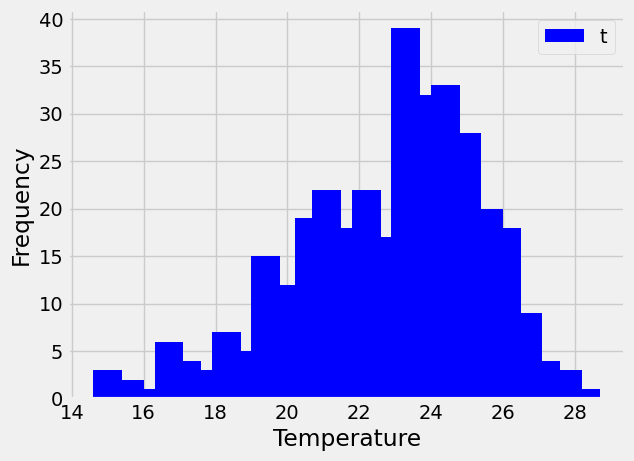

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tick_locations = [int(value) for value in xaxis]
plt.bar(xaxis, yaxis, color='b',  align='center')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.show()

# Close Session

In [347]:
# Close Session
session.close()